### IBDA2032 - Kelompok 7
1. Christopher Jonathan (IBDA 2021 / 212100170). Kontribusi: 33.333%
2. Matthew Daniel Surupati (IBDA 2020 / 202000673). Kontribusi: 33.333%
3. Tatiana Clarissa Jolie (IBDA 2021 / 212100674). Kontribusi: 33.333%

# I. K-Means Clustering

Dalam tugas ini anda akan membandingkan 2 jenis metode clustering yang paling populer. Berikut disediakan data statistik umum dari setiap provinsi di indonesia. Tugas anda adalah membuat pengelompokan provinsi berdasarkan data berikut. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Dataset

In [12]:
data = pd.read_csv("province.csv")
data

,province_id,province_name,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,4906835,86,4,0,0,96.720,3.869000
1,2,Bali,4104900,738,9,2,0,115.120,-8.250000
2,3,Banten,11704877,1298,84,4,1,106.160,-6.315000
3,4,Bengkulu,1844800,93,0,0,0,102.315,-3.414000
4,5,DI Yogyakarta,3553100,1134,22,2,1,110.390,-7.863000
5,6,DKI Jakarta,10012271,1353,598,51,31,106.853,-6.162000
6,7,Gorontalo,1115633,93,0,0,0,123.134,0.637194
7,8,Jambi,3344400,63,1,0,0,103.623,-1.625000
8,9,Jawa Barat,46029668,1306,98,14,5,107.633,-7.144000
9,10,Jawa Tengah,33522663,986,43,6,0,110.100,-7.209900


### Standardized
Gunakan StandardScaler untuk melakukan standardisasi pada setiap fitur

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = [[data['population'][i], data['population_kmsquare'][i], data['confirmed'][i], data['deceased'][i], data['released'][i], data['longitude'][i], data['latitude'][i]] for i in range(len(data))]
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.23796375, -0.50242972, -0.25471803, -0.28605073, -0.25075661,
        -1.66577263,  1.81995153],
       [-0.31413006,  1.04600098, -0.20556699, -0.05987108, -0.25075661,
         0.15568578, -1.50369521],
       [ 0.40770175,  2.37594146,  0.53169859,  0.16630856, -0.06541477,
        -0.73128527, -0.9730197 ],
       [-0.52879019, -0.48580546, -0.29403886, -0.28605073, -0.25075661,
        -1.11191068, -0.17741782],
       [-0.36653901,  1.98645889, -0.07777429, -0.05987108, -0.06541477,
        -0.31254782, -1.39756011],
       [ 0.24694115,  2.50656061,  5.58442537,  5.4815303 ,  5.49484052,
        -0.6626836 , -0.93105932],
       [-0.59804513, -0.48580546, -0.29403886, -0.28605073, -0.25075661,
         0.94901011,  0.9336258 ],
       [-0.38636095, -0.55705228, -0.28420865, -0.28605073, -0.25075661,
        -0.98242875,  0.31321705],
       [ 3.66780716,  2.39494061,  0.6693215 ,  1.29720681,  0.6759526 ,
        -0.5854696 , -1.20037371],
       [ 2.47991487,  1.6349

### K-Means
Gunakan KMeans untuk melakukan clustering pada fitur yang sudah distandardisasi. Hitung inertia untuk jumlah cluster yang berbeda, lalu plot penurunan inertia terhadap jumlah cluster

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


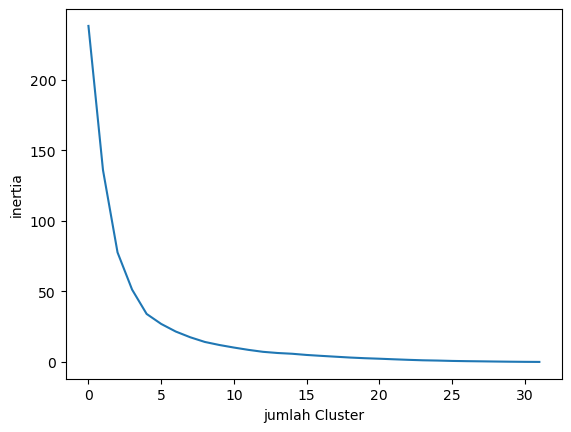

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,33):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(wcss)
plt.xlabel('jumlah Cluster')
plt.ylabel('inertia')
plt.show()

Pilihlah jumlah cluster yang kira-kira paling sesuai menurut aturan elbow, lalu tampilkan nama provinsi untuk setiap cluster

In [15]:
kmeans = KMeans(n_clusters=5, random_state=28)
kmeans.fit(X)

labels = kmeans.predict(X)
labels

array([4, 0, 0, 4, 0, 1, 2, 4, 3, 3, 3, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 0,
       0, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4])

In [16]:
for k in range(max(labels)+1):
    cluster = []
    for i in range(len(labels)):
        if labels[i] == k:
            cluster.append(data["province_name"][i])
    print(f"Clustering {k+1}: {cluster} ")

Clustering 1: ['Bali', 'Banten', 'DI Yogyakarta', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur'] 
Clustering 2: ['DKI Jakarta'] 
Clustering 3: ['Gorontalo', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara'] 
Clustering 4: ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur'] 
Clustering 5: ['Aceh', 'Bengkulu', 'Jambi', 'Kalimantan Barat', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Riau', 'Sumatra Barat', 'Sumatra Selatan', 'Sumatra Utara'] 


# II. Hierarchical Clustering 
Sekarang coba gunakan AgglomerativeClustering untuk melakukan clustering pada fitur yang sudah distandardisasi. Hitung silhouette_score untuk jumlah cluster yang berbeda, lalu plot perubahan silhouette_score terhadap jumlah cluster

Text(0, 0.5, 'skor silhouette')

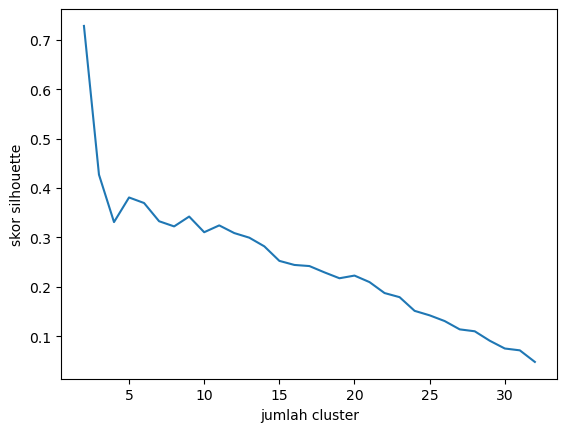

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

ss = []
for i in range(2,33):
    ac = AgglomerativeClustering(n_clusters=i)
    ac.fit(X)
    ss.append(silhouette_score(X, ac.labels_))

plt.plot(range(2,33), ss)
plt.xlabel('jumlah cluster')
plt.ylabel('skor silhouette')

Bacalah mengenai silhouette analysis (scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). Pilihlah jumlah cluster yang kira-kira paling sesuai menurut aturan silhouette, lalu tampilkan nama provinsi untuk setiap cluster. Bandingkan hasilnya dengan KMeans Clustering

In [18]:
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)
labels = ac.labels_
labels

array([1, 0, 0, 1, 0, 3, 2, 1, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1], dtype=int64)

In [19]:
for k in range(max(labels)+1):
    cluster = []
    for i in range(len(labels)):
        if labels[i] == k:
            cluster.append(data["province_name"][i])
    print(f"Clustering {k+1}: {cluster} ")

Clustering 1: ['Bali', 'Banten', 'DI Yogyakarta', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur'] 
Clustering 2: ['Aceh', 'Bengkulu', 'Jambi', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Riau', 'Sumatra Barat', 'Sumatra Selatan', 'Sumatra Utara'] 
Clustering 3: ['Gorontalo', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara'] 
Clustering 4: ['DKI Jakarta'] 
Clustering 5: ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur'] 


### Dendrogram
Tampilkan dendrogram (hubungan antar cluster) dari seluruh provinsi di indonesia. Tuliskan hasil pengamatanmu mengenai kemiripan dan perbedaan antar provinsi

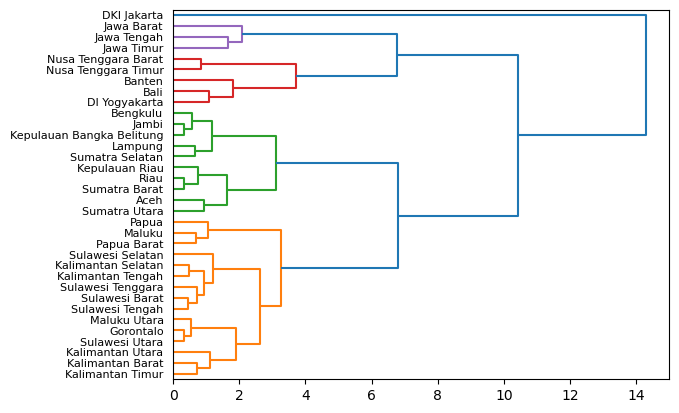

In [20]:
from scipy.cluster.hierarchy import dendrogram
labelList = data['province_name'].unique()

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(
            linkage_matrix,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold = 5,
            )

# setting distance_threshold=0 ensures we compute the full tree.
ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ac = ac.fit(X)
plot_dendrogram(ac, truncate_mode="level", p=3)
plt.show()

### Kesimpulan
Bandingkan dan simpulkan metode K-Means dan Hierarchical Clustering di atas

Dalam kasus ini, dapat dilihat bahwa K-Means Clustering menghasilkan hasil clustering yang relatif mirip dengan Hierarchical Clustering. Metode clustering K-Means dan Hierarchical Clustering dapat digunakan tergantung pada tujuan dan karakteristik dataset yang ingin dianalisis. 

K-Means adalah teknik yang cukup sederhana dan cepat dalam proses clustering obyek. Pada K-Means setiap data akan menentukan anggota clusternya dengan cara menghitung jaraknya dengan setiap centroid. Oleh karena itu, centroid dapat berubah-ubah dan posisi seluruh data terhadap cluster baru juga akan berubah. Pada Agglomerative Hierarchical Clustering dilakukan dengan cara menggabungkan 2 cluster terdekat dan akan membentuk cluster gabungan pertama.

Kedua metode clustering ini memiliki kelebihan dan kekurangan masing-masing. K-Means lebih cepat dan lebih baik digunakan pada data dengan jumlah variabel yang sedikit, sedangkan Hierarchical Clustering lebih baik digunakan pada data dengan jumlah variabel yang banyak dan memiliki struktur hierarki. Oleh karena itu, pemilihan metode clustering harus disesuaikan kembali dengan karakteristik dataset dan tujuan analisis.